In [11]:
import ampal
import isambard
import isambard.specifications as specs
import isambard.modelling as modelling
import isambard.optimisation.evo_optimizers as ev_opts
from isambard.optimisation.evo_optimizers import Parameter
import budeff

import matplotlib.pyplot as plt
import numpy as np
import itertools
from pprint import pprint
import nglview as nv
from contextlib import redirect_stdout

%matplotlib inline

In [12]:
def show_ball_and_stick(ampal):
    view = nv.show_text(ampal.pdb)
    view.add_ball_and_stick()
    view.remove_cartoon()
    return view

In [13]:
REGISTER_ADJUST = {
    'a': 0,
    'b': 102.8,
    'c': 205.6,
    'd': 308.4,
    'e': 51.4,
    'f': 154.2,
    'g': 257
}

In [14]:
specification = specs.CoiledCoil.from_parameters

In [15]:
sequences = ['GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY', 
             'GEIAALKQEIAALKKENAALKWEIAALKQGYY', 'GEIAALKQEIAALKKENAALKWEIAALKQGYY']

In [16]:
parameters = [
    Parameter.static('Oligomeric State', 5),
    Parameter.static('Helix Length', 32),
    Parameter.dynamic('Radius', 8.0, 1.0),
    Parameter.dynamic('Pitch', 200, 60),
    Parameter.dynamic('PhiCA', REGISTER_ADJUST['f'], 27),  
]

In [17]:
default_values = [x.default_value for x in parameters]
print(default_values)

[5, 32, 8.0, 200, 154.2]


In [18]:
def get_bude_total_energy(ampal_object):
    return budeff.get_internal_energy(ampal_object).total_energy

### Genetic Algorithm

In [19]:
opt_ga = ev_opts.GA(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [20]:
opt_ga.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max     
0  	71   	-2218.23	296.084	-2790.72	-1467.68
1  	72   	-2462.29	136.798	-2800.25	-2264.43
2  	56   	-2568.27	130.402	-2843.22	-2397.16
3  	66   	-2678.51	115.281	-2866.2 	-2482.67
4  	66   	-2772.6 	55.2667	-2866.21	-2641.99
5  	82   	-2818.42	22.1368	-2867.63	-2767.19
6  	67   	-2835.54	11.8815	-2867.63	-2810.81
7  	72   	-2844.48	8.99936	-2868.44	-2834.77
8  	72   	-2851.45	10.3937	-2871.55	-2838.64
9  	76   	-2860.47	8.25601	-2871.55	-2843.33
10 	86   	-2867.62	2.00877	-2871.55	-2863.01
11 	58   	-2869.02	1.42227	-2871.72	-2866.15
12 	58   	-2870.07	0.959164	-2871.73	-2868.27
13 	79   	-2870.98	0.54469 	-2871.75	-2869.8 
14 	67   	-2871.32	0.256053	-2871.8 	-2870.77
15 	70   	-2871.42	0.177312	-2871.8 	-2871.16
16 	53   	-2871.49	0.147026	-2871.8 	-2871.26
17 	69   	-2871.53	0.131144	-2871.88	-2871.33
18 	76   	-2871.57	0.120594	-2871.88	-2871.39
19 	60   	-2871.57	0.112345	-2871.88	-2871.41
20 	63   	-2871.6 	0.102767	-2871.88	-2871.45
2

In [21]:
optimized_model_ga = opt_ga.best_model

In [22]:
budeff.get_internal_energy(optimized_model_ga).total_energy

-2871.8750648000355

In [23]:
funnel_data_ga = opt_ga.make_energy_funnel_data()

In [24]:
xs = [x[0] for x in funnel_data_ga]
ys = [x[1] for x in funnel_data_ga]
zs = [x[2] for x in funnel_data_ga]

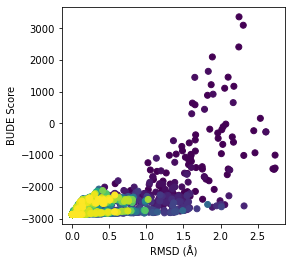

In [25]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('ga.png')

In [26]:
f = open('d_CC-Di_pentamer-optimized-model-ga.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_ga.pdb)

### Differential Evolution

In [27]:
opt_de = ev_opts.DE(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [28]:
opt_de.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max   
0  	100  	-1745.39	743.445	-2733.15	708.48
1  	100  	-2166.25	388.394	-2818.11	-911.988
2  	100  	-2335.86	235.301	-2818.11	-1119.83
3  	100  	-2459.46	145.496	-2864.58	-2183.76
4  	100  	-2506.38	148.035	-2864.58	-2210.49
5  	100  	-2571.47	136.013	-2864.58	-2255.23
6  	100  	-2612.31	124.41 	-2864.58	-2256.38
7  	100  	-2655.56	111.317	-2864.58	-2317.83
8  	100  	-2705.03	83.6923	-2864.58	-2517.42
9  	100  	-2738.34	69.1538	-2864.67	-2535.22
10 	100  	-2765.28	53.6181	-2864.67	-2586.91
11 	100  	-2784.98	43.0878	-2864.67	-2673.93
12 	100  	-2806.26	33.5798	-2866.97	-2692.7 
13 	100  	-2821.27	29.0917	-2869.52	-2702.95
14 	100  	-2830.62	22.8441	-2869.52	-2765.94
15 	100  	-2839.26	20.2242	-2869.57	-2791.67
16 	100  	-2846.54	16.909 	-2869.57	-2798.2 
17 	100  	-2854.18	13.1485	-2870.37	-2814.41
18 	100  	-2861.58	8.6774 	-2872.24	-2829.23
19 	100  	-2865.07	6.1639 	-2872.24	-2837.75
20 	100  	-2867.25	3.35055	-2872.24	-2857.15
21 	100  	-286

In [29]:
optimized_model_de = opt_de.best_model
budeff.get_internal_energy(optimized_model_de).total_energy

-2873.1569725144695

In [30]:
funnel_data_de = opt_de.make_energy_funnel_data()

In [31]:
xs = [x[0] for x in funnel_data_de]
ys = [x[1] for x in funnel_data_de]
zs = [x[2] for x in funnel_data_de]

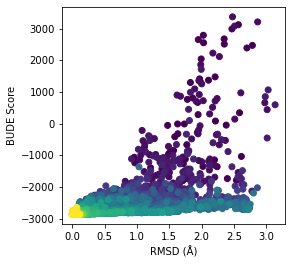

In [32]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('de.png')

In [33]:
f = open('d_CC-Di_pentamer-optimized-model-de.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_de.pdb)

### Particle Swarm Optimisation

In [34]:
opt_pso = ev_opts.PSO(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [35]:
opt_pso.run_opt(100, 30, cores=8)

gen	evals	avg  	std    	min     	max    
0  	100  	-2006	687.891	-2835.11	1005.14
1  	87   	-2389.55	244.184	-2865.58	-1364.45
2  	48   	-2407.05	213.972	-2848.93	-1584.79
3  	73   	-1442.77	1063.92	-2731.49	1721.47 
4  	92   	-2011.43	585.224	-2796.77	242.38  
5  	90   	-2275.02	414.347	-2835.2 	-241.309
6  	65   	-2260.38	336.427	-2835.2 	-836.376
7  	82   	-2084.97	475.197	-2798.7 	201.597 
8  	91   	-2292.63	306.354	-2803.7 	-1120.41
9  	83   	-2359.9 	242.097	-2808.33	-1120.41
10 	46   	-2341.76	266.03 	-2851.5 	-977.421
11 	73   	-1805.57	653.94 	-2851.5 	334.148 
12 	94   	-1502.45	686.328	-2753.75	591.041 
13 	89   	-2060.7 	623.636	-2851.48	591.041 
14 	64   	-2316.75	333.694	-2828.26	-1014.47
15 	57   	-2100.53	477.904	-2795.9 	-11.0761
16 	77   	-1888.25	598.538	-2771.97	1380.39 
17 	92   	-2294.08	339.907	-2835.74	-595.716
18 	66   	-2278.18	365.438	-2837.26	-550.877
19 	42   	-2374.68	342.184	-2839.66	-595.716
20 	56   	-2317.98	336.689	-2839.66	-579.448
21 	73   	-2301.66

In [36]:
optimized_model_pso = opt_pso.best_model
budeff.get_internal_energy(optimized_model_pso).total_energy

-2865.581842939357

In [37]:
funnel_data_pso = opt_pso.make_energy_funnel_data()

In [38]:
xs = [x[0] for x in funnel_data_pso]
ys = [x[1] for x in funnel_data_pso]
zs = [x[2] for x in funnel_data_pso]

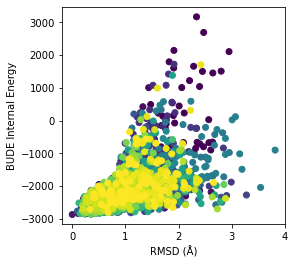

In [39]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Internal Energy')

fig.savefig('pso.png')

In [40]:
f = open('d_CC-Di_pentamer-optimized-model-pso.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_pso.pdb)

### Covariance Matrix Adaptive Evolutionary Strategy

In [41]:
opt_cmaes = ev_opts.CMAES(specification, sequences, parameters, get_bude_total_energy)

/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/eva/anaconda3/lib/python3.9/site-packages/deap/creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [42]:
opt_cmaes.run_opt(100, 30, cores=8)

gen	evals	avg     	std    	min     	max    
0  	100  	-1249.69	942.577	-2512.68	1567.53
1  	100  	-1591.6 	1147.34	-2718.49	2584.77
2  	100  	-1789.08	1388.25	-2805.44	4081.79
3  	100  	-2488.55	121.993	-2844.03	-2091.32
4  	100  	-2540.42	141.206	-2851.36	-2154.84
5  	100  	-2618.68	143.825	-2868.11	-2376.98
6  	100  	-2645.92	157.818	-2863.27	-2385.82
7  	100  	-2770   	99.9448	-2868.15	-2403.24
8  	100  	-2819.14	59.4538	-2869.71	-2511.3 
9  	100  	-2800.64	97.019 	-2870   	-2404.03
10 	100  	-2850.82	34.497 	-2870.41	-2742.7 
11 	100  	-2850.11	38.8234	-2871.58	-2742.29
12 	100  	-2866.92	16.3982	-2872.61	-2751.74
13 	100  	-2865.38	22.2921	-2872.19	-2751.35
14 	100  	-2870.67	1.00902	-2872.68	-2867.16
15 	100  	-2866.97	20.8844	-2872.81	-2755.14
16 	100  	-2841.24	69.0701	-2872.82	-2511.07
17 	100  	-2854.37	40.0386	-2872.99	-2754.39
18 	100  	-2839.76	51.8552	-2872.98	-2691.84
19 	100  	-2864.21	27.2791	-2873.04	-2754.33
20 	100  	-2848.26	46.0864	-2873.19	-2755.35
21 	100  	-285

In [43]:
optimized_model_cmaes = opt_cmaes.best_model
budeff.get_internal_energy(optimized_model_cmaes).total_energy

-2873.4182188437053

In [44]:
funnel_data_cmaes = opt_cmaes.make_energy_funnel_data()

In [45]:
xs = [x[0] for x in funnel_data_cmaes]
ys = [x[1] for x in funnel_data_cmaes]
zs = [x[2] for x in funnel_data_cmaes]

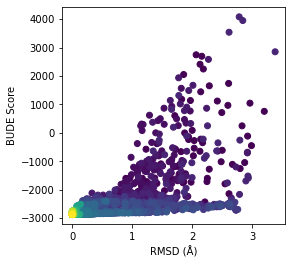

In [46]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(4, 4)
#ax.grid()
ax.scatter(xs, ys, c=zs)
ax.set_xlabel('RMSD (Å)')
ax.set_ylabel('BUDE Score')

fig.savefig('cmaes.png')

In [47]:
f = open('d_CC-Di_pentamer-optimized-model-cmaes.pdb', 'w')

with redirect_stdout(f):
    print(optimized_model_cmaes.pdb)